### PROBLEM STATEMENT

**participants need to analyse and create features of the following description**

    'DATE': create the date from year, month and day of the week 
    'LOW': Lower value of DEP_TIME_BLK
    'HIGH': Higher value of DEP_TIME_BLK
    'TIMESTAMP': create a timestamp with date and lower value of DEP_TIME_BLK
    'WIND_CHILL':  the perceived temperature due to cooling effect of wind blowing   
    'PRCP_SNOW_RATIO': ratio of precipitation and snow
    'PLANE_AGE_AIRLINE_AIRPORT_FLIGHTS_MONTH_RATIO': ratio of plane age and airline and airport flights months.
    'SEAT_DISTRIBUTION': Ratio of seats and in  concurrent flight CONCURRENT_FLIGHTS
    'SEAT_DISTRIBUTION_NORMALISED': normalized values of ratio of seats and in  concurrent flight 

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import datetime as dt

In [2]:
data= pd.read_csv("Desktop/Machine hack/DEC/participants_dataset_DES.csv")

In [3]:
submission=pd.read_csv("Desktop/Machine hack/DEC/submission_sample.csv")

C:\conda_tmp\ipykernel_15856\2949533786.py:1: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  submission=pd.read_csv("Desktop/Machine hack/DEC/submission_sample.csv")


In [4]:
submission.head()

,DATE,LOW,HIGH,TIMESTAMP,WIND_CHILL,PRCP_SNOW_RATIO,PLANE_AGE_AIRLINE_AIRPORT_FLIGHTS_MONTH_RATIO,SEAT_DISTRIBUTION,SEAT_DISTRIBUTION_NORMALISED
0,07/01/20,2100,2159,07/01/20 21:00,0,0,0,0,0
1,07/01/20,2100,2159,07/01/20 21:00,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


In [5]:
submission['DATE'].value_counts()

0           134464
0            65534
07/01/20         2
Name: DATE, dtype: int64

In [6]:
data.head()

,AIRPLANE_ID,YEAR,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,608900,2020.0,1.0,4,0,0800-0859,NaN,3.0,22.0,NaN,...,11.0,Minneapolis-St Paul International,33.291,-75.177,McCarran International,NaN,NaN,0.0,NaN,NaN
1,211610,2020.0,1.0,4,0,0600-0659,5.0,3.0,25.0,76.0,...,2.0,Dallas Fort Worth Regional,34.163,-71.006,Orlando International,0.00,NaN,0.0,57.0,4.93
2,566705,NaN,1.0,4,0,1200-1259,3.0,NaN,19.0,174.0,...,11.0,Norfolk International,29.534,-81.622,Chicago Midway International,NaN,0.0,0.0,77.0,7.58
3,338088,2020.0,NaN,3,1,1000-1059,7.0,NaN,NaN,143.0,...,6.0,Dallas Fort Worth Regional,38.836,-91.015,Syracuse Hancock International,0.00,0.0,1.2,39.0,6.98
4,216070,2020.0,1.0,3,1,2200-2259,NaN,NaN,28.0,49.0,...,NaN,Newark Liberty International,36.090,-95.852,Los Angeles International,0.34,0.4,NaN,35.0,13.79


**Columns**

   **MONTH**: Month
   
   **DAY_OF_WEEK**: Day of Week
   
   **DEP_DEL15**: TARGET Binary of a departure delay over 15 minutes (1 is yes)
   
   **DISTANCE_GROUP**: Distance group to be flown by departing aircraft
   
   **DEP_BLOCK**: Departure block
   
   **SEGMENT_NUMBER**: The segment that this tail number is on for the day
   
   **CONCURRENT_FLIGHTS**: Concurrent flights leaving from the airport in the same departure block
   
   **NUMBER_OF_SEATS**: Number of seats on the aircraft
   
   **CARRIER_NAME**: Carrier
   
   **AIRPORT_FLIGHTS_MONTH**: Avg Airport Flights per Month
   
   **AIRLINE_FLIGHTS_MONTH**: Avg Airline Flights per Month
   
   **AIRLINE_AIRPORT_FLIGHTS_MONTH**: Avg Flights per month for Airline AND Airport
   
   **AVG_MONTHLY_PASS_AIRPORT**: Avg Passengers for the departing airport for the month
   
   **AVG_MONTHLY_PASS_AIRLINE**: Avg Passengers for the airline for the month
   
   **FLT_ATTENDANTS_PER_PASS**: Flight attendants per passenger for airline
   
   **GROUND_SERV_PER_PASS**: Ground service employees (service desk) per passenger for airline
   
   **PLANE_AGE**: Age of departing aircraft
   
   **DEPARTING_AIRPORT**: Departing Airport
   
   **LATITUDE**: Latitude of departing airport
   
   **LONGITUDE**: Longitude of departing airport
   
   **PREVIOUS_AIRPORT**: Previous airport that aircraft departed from
   
   **PRCP**: Inches of precipitation for the day
   
   **SNOW**: Inches of snowfall for the day
   
   **SNWD**: Inches of snow on the ground for the day
   
   **TMAX**: Max temperature for the day
   
   **AWND**: Max wind speed for the day

In [7]:
data.describe()


,AIRPLANE_ID,YEAR,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,...,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
count,200000.000000,160000.0,160000.0,200000.000000,200000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,...,160000.000000,160000.000000,160000.000000,200000.000000,200000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000
mean,310210.434280,2020.0,1.0,4.002285,0.183155,3.908119,3.020875,25.774156,131.030694,12384.810744,...,0.000100,0.000140,11.268844,37.263332,-91.305506,0.130346,0.051515,0.360517,51.072050,8.561424
std,173278.585722,0.0,0.0,1.741150,0.386795,2.262299,1.662605,18.477595,46.244700,7879.165572,...,0.000093,0.000048,6.777047,4.891605,14.944102,0.325375,0.279414,1.253789,17.968801,4.017869
min,10001.000000,2020.0,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,44.000000,1141.000000,...,0.000000,0.000007,1.000000,21.723000,-130.382000,0.000000,0.000000,0.000000,1.000000,0.890000
25%,159912.250000,2020.0,1.0,3.000000,0.000000,2.000000,2.000000,10.000000,76.000000,5400.000000,...,0.000033,0.000099,4.000000,33.534000,-97.134250,0.000000,0.000000,0.000000,37.000000,5.190000
50%,310558.500000,2020.0,1.0,4.000000,0.000000,3.000000,3.000000,22.000000,143.000000,10919.000000,...,0.000062,0.000125,11.000000,38.883000,-87.654000,0.000000,0.000000,0.000000,51.000000,7.670000
75%,460875.500000,2020.0,1.0,5.000000,0.000000,5.000000,4.000000,36.000000,164.000000,17611.000000,...,0.000144,0.000177,17.000000,40.806000,-80.839000,0.080000,0.000000,0.000000,63.000000,11.210000
max,609997.000000,2020.0,1.0,7.000000,1.000000,11.000000,8.000000,90.000000,322.000000,30842.000000,...,0.000348,0.000229,31.000000,47.936000,-71.006000,1.970000,2.600000,7.400000,85.000000,26.530000


In [8]:
submission.describe()

,LOW,HIGH,WIND_CHILL,PRCP_SNOW_RATIO,PLANE_AGE_AIRLINE_AIRPORT_FLIGHTS_MONTH_RATIO,SEAT_DISTRIBUTION,SEAT_DISTRIBUTION_NORMALISED
count,200000.000000,200000.00000,200000.0,200000.0,200000.0,200000.0,200000.0
mean,0.021000,0.02159,0.0,0.0,0.0,0.0,0.0
std,6.640766,6.82734,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
50%,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
75%,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
max,2100.000000,2159.00000,0.0,0.0,0.0,0.0,0.0


### Checking For Missing Values

In [9]:
data.isna().sum()

AIRPLANE_ID                          0
YEAR                             40000
MONTH                            40000
DAY_OF_WEEK                          0
DEP_DEL15                            0
DEP_TIME_BLK                         0
DISTANCE_GROUP                   40000
SEGMENT_NUMBER                   40000
CONCURRENT_FLIGHTS               40000
NUMBER_OF_SEATS                  40000
CARRIER_NAME                         0
AIRPORT_FLIGHTS_MONTH            40000
AIRLINE_FLIGHTS_MONTH            40000
AIRLINE_AIRPORT_FLIGHTS_MONTH    40000
AVG_MONTHLY_PASS_AIRPORT         40000
AVG_MONTHLY_PASS_AIRLINE         40000
FLT_ATTENDANTS_PER_PASS          40000
GROUND_SERV_PER_PASS             40000
PLANE_AGE                        40000
DEPARTING_AIRPORT                    0
LATITUDE                             0
LONGITUDE                            0
PREVIOUS_AIRPORT                     0
PRCP                             40000
SNOW                             40000
SNWD                     

In [10]:
mapping = {data.columns[3]:'DAY'}
data = data.rename(columns=mapping)

### Missing Value Treatment 

#### a) For Datetime Features

**For Datetime features,missing values are replaced by the mode value of the feutures**

In [16]:
data['YEAR'].mode()

0    2020.0
Name: YEAR, dtype: float64

In [17]:
data['YEAR']=data['YEAR'].fillna(2020)

In [18]:
data['MONTH'].unique()

array([ 1., nan])

In [19]:
data['MONTH']=data['MONTH'].fillna(1)

In [20]:
data['HOUR']=data['DEP_TIME_BLK'].str[0:2]

In [21]:
data.head()

,AIRPLANE_ID,YEAR,MONTH,DAY,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,...,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,HOUR
0,608900,2020.0,1.0,4,0,0800-0859,NaN,3.0,22.0,NaN,...,Minneapolis-St Paul International,33.291,-75.177,McCarran International,NaN,NaN,0.0,NaN,NaN,08
1,211610,2020.0,1.0,4,0,0600-0659,5.0,3.0,25.0,76.0,...,Dallas Fort Worth Regional,34.163,-71.006,Orlando International,0.00,NaN,0.0,57.0,4.93,06
2,566705,2020.0,1.0,4,0,1200-1259,3.0,NaN,19.0,174.0,...,Norfolk International,29.534,-81.622,Chicago Midway International,NaN,0.0,0.0,77.0,7.58,12
3,338088,2020.0,1.0,3,1,1000-1059,7.0,NaN,NaN,143.0,...,Dallas Fort Worth Regional,38.836,-91.015,Syracuse Hancock International,0.00,0.0,1.2,39.0,6.98,10
4,216070,2020.0,1.0,3,1,2200-2259,NaN,NaN,28.0,49.0,...,Newark Liberty International,36.090,-95.852,Los Angeles International,0.34,0.4,NaN,35.0,13.79,22


**Converting Columns into Datetime Feutures and adding it to submission file**

In [22]:
submission['DATE']=pd.to_datetime(data[["YEAR", "MONTH", "DAY"]])

In [23]:
submission['TIMESTAMP']=pd.to_datetime(data[["YEAR", "MONTH", "DAY","HOUR"]])

In [24]:
submission['DATE'].head()

0   2020-01-04
1   2020-01-04
2   2020-01-04
3   2020-01-03
4   2020-01-03
Name: DATE, dtype: datetime64[ns]

In [26]:
submission.head()

,DATE,LOW,HIGH,TIMESTAMP,WIND_CHILL,PRCP_SNOW_RATIO,PLANE_AGE_AIRLINE_AIRPORT_FLIGHTS_MONTH_RATIO,SEAT_DISTRIBUTION,SEAT_DISTRIBUTION_NORMALISED
0,2020-01-04,2100,2159,2020-01-04 08:00:00,0,0,0,0,0
1,2020-01-04,2100,2159,2020-01-04 06:00:00,0,0,0,0,0
2,2020-01-04,0,0,2020-01-04 12:00:00,0,0,0,0,0
3,2020-01-03,0,0,2020-01-03 10:00:00,0,0,0,0,0
4,2020-01-03,0,0,2020-01-03 22:00:00,0,0,0,0,0


In [27]:
submission['LOW']=data['DEP_TIME_BLK'].str[0:4] #submission's 'low' column value is extracted from 'dep_time_blk' first 4 characters

In [28]:
submission['HIGH']=data['DEP_TIME_BLK'].str[5:] #submission's 'high' column value is extracted from 'dep_time_blk' last 4 characters

In [29]:
submission['DATE']= submission['DATE'].dt.strftime('%d/%m/%y') #Changing Datetime format

In [30]:
submission['TIMESTAMP']= submission['TIMESTAMP'].dt.strftime('%d/%m/%y %H:%M')# Changing Timestamp format

In [31]:
submission.head()

,DATE,LOW,HIGH,TIMESTAMP,WIND_CHILL,PRCP_SNOW_RATIO,PLANE_AGE_AIRLINE_AIRPORT_FLIGHTS_MONTH_RATIO,SEAT_DISTRIBUTION,SEAT_DISTRIBUTION_NORMALISED
0,04/01/20,0800,0859,04/01/20 08:00,0,0,0,0,0
1,04/01/20,0600,0659,04/01/20 06:00,0,0,0,0,0
2,04/01/20,1200,1259,04/01/20 12:00,0,0,0,0,0
3,03/01/20,1000,1059,03/01/20 10:00,0,0,0,0,0
4,03/01/20,2200,2259,03/01/20 22:00,0,0,0,0,0


### b) Missing Value Treatment for 'TMAX' AND 'AWND' Features

**For features TMAX and AWND ,strategy of multivariate imputation is used.For multivariate imputation,sklearn Iterative Imputer is used**

In [35]:
#importing sklearn Iterative imputer package
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#importing Linear Regression package from sklearn linear model
from sklearn.linear_model import LinearRegression


In [36]:
#Dropping columns which are not required for the analysis
data1=data.drop(['AIRPLANE_ID','DEP_TIME_BLK','CARRIER_NAME','DEPARTING_AIRPORT','PREVIOUS_AIRPORT'],axis=1)                  


**Transforming dataset using Iterative imputer with linear regression as an estimator**

In [37]:
lr =LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=20, verbose=2, imputation_order='roman',random_state=0)
X=imp.fit_transform(data1)

[IterativeImputer] Completing matrix with shape (200000, 24)
[IterativeImputer] Ending imputation round 1/20, elapsed time 12.75
[IterativeImputer] Change: 8739097.273793092, scaled tolerance: 13382.999 
[IterativeImputer] Ending imputation round 2/20, elapsed time 24.70
[IterativeImputer] Change: 1746800.489852337, scaled tolerance: 13382.999 
[IterativeImputer] Ending imputation round 3/20, elapsed time 37.29
[IterativeImputer] Change: 681751.3919315502, scaled tolerance: 13382.999 
[IterativeImputer] Ending imputation round 4/20, elapsed time 48.48
[IterativeImputer] Change: 294257.61940173415, scaled tolerance: 13382.999 
[IterativeImputer] Ending imputation round 5/20, elapsed time 60.80
[IterativeImputer] Change: 127756.49069250247, scaled tolerance: 13382.999 
[IterativeImputer] Ending imputation round 6/20, elapsed time 72.53
[IterativeImputer] Change: 55575.642948299545, scaled tolerance: 13382.999 
[IterativeImputer] Ending imputation round 7/20, elapsed time 83.92
[Iterative

In [38]:
columns=['YEAR', 'MONTH', 'DAY', 'DEP_DEL15', 'DISTANCE_GROUP', 'SEGMENT_NUMBER',
       'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'AIRPORT_FLIGHTS_MONTH',
       'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH',
       'AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE',
       'FLT_ATTENDANTS_PER_PASS', 'GROUND_SERV_PER_PASS', 'PLANE_AGE',
       'LATITUDE', 'LONGITUDE', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND',
       'HOUR']

In [39]:
data1[columns]=X

In [40]:
data1

,YEAR,MONTH,DAY,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,...,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND,HOUR
0,2020.0,1.0,4.0,0.0,4.300536,3.000000,22.000000,161.105143,4728.000000,107363.0000,...,0.000129,11.000000,33.291,-75.177,0.152637,-0.001463,0.000000,55.780413,7.527921,8.0
1,2020.0,1.0,4.0,0.0,5.000000,3.000000,25.000000,76.000000,8706.362720,61899.0000,...,0.000099,2.000000,34.163,-71.006,0.000000,0.064344,0.000000,57.000000,4.930000,6.0
2,2020.0,1.0,4.0,0.0,3.000000,3.169623,19.000000,174.000000,10321.932904,45432.0000,...,0.000099,11.000000,29.534,-81.622,0.144338,0.000000,0.000000,77.000000,7.580000,12.0
3,2020.0,1.0,3.0,1.0,7.000000,3.478210,13.404762,143.000000,4150.000000,86124.1298,...,0.000099,6.000000,38.836,-91.015,0.000000,0.000000,1.200000,39.000000,6.980000,10.0
4,2020.0,1.0,3.0,1.0,3.529168,3.160595,28.000000,49.000000,7565.000000,23248.0000,...,0.000177,10.632521,36.090,-95.852,0.340000,0.400000,0.523447,35.000000,13.790000,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2020.0,1.0,3.0,0.0,2.000000,7.000000,9.611043,279.000000,7014.000000,107363.0000,...,0.000099,5.000000,35.819,-89.218,0.202063,0.000000,0.000000,51.000000,2.650000,8.0
199996,2020.0,1.0,6.0,0.0,5.000000,1.000000,25.000000,175.000000,10126.000000,12442.0000,...,0.000099,8.000000,29.941,-87.495,0.000000,0.000000,0.323780,55.000000,21.240000,17.0
199997,2020.0,1.0,1.0,0.0,5.000000,4.000000,25.000000,185.000000,13676.000000,46597.0000,...,0.000229,17.000000,40.663,-97.084,0.000000,0.032330,0.000000,61.373591,3.850000,22.0
199998,2020.0,1.0,7.0,0.0,1.000000,1.000000,52.000000,102.000000,13436.000000,22380.0000,...,0.000143,12.000000,39.511,-76.061,0.097367,0.092435,0.647227,41.000000,3.660000,16.0


**Checking the diffrence between original data and transformed data by using kdeplot**

<AxesSubplot:xlabel='TMAX', ylabel='Density'>

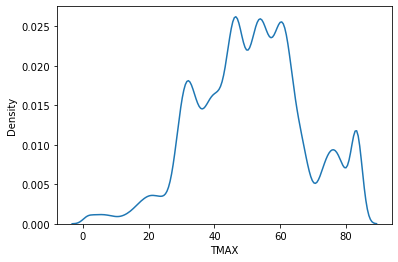

In [41]:
sns.kdeplot(data1['TMAX'])

<AxesSubplot:xlabel='TMAX', ylabel='Density'>

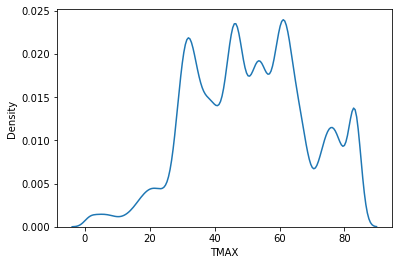

In [42]:
sns.kdeplot(data['TMAX'])

<AxesSubplot:xlabel='AWND', ylabel='Density'>

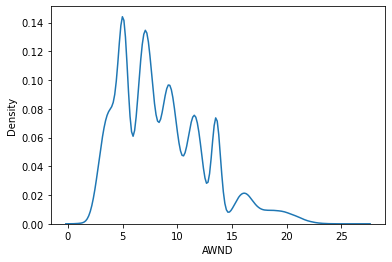

In [43]:
sns.kdeplot(data['AWND'])

<AxesSubplot:xlabel='AWND', ylabel='Density'>

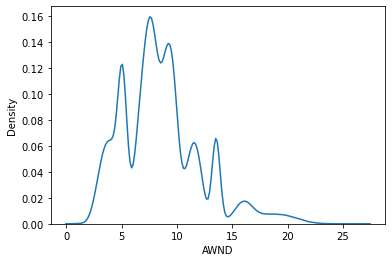

In [44]:
sns.kdeplot(data1['AWND'])

**We can observe that imputation is not changing the shape of the curve**
**Probability Distribution of the transformed data is similar to that of the original data**

In [3]:
#calculating wind chill from TMAX and AWND values

In [45]:
submission['WIND_CHILL']= 35.74 + (0.6215*data1['TMAX']) - (35.75*(data1['AWND']**0.16)) + (0.4275*data1['TMAX']*(data1['AWND']**0.16))

*(Wind Chill Temperature is given by the formula==> 35.74 + 0.6215×T - 35.75×V^0.16 + 0.4275×T×V^0.16)*

In [46]:
submission['WIND_CHILL'].head()

0    53.965464
1    56.473086
2    79.678830
3    33.944654
4    25.860071
Name: WIND_CHILL, dtype: float64

In [47]:
submission.head()

,DATE,LOW,HIGH,TIMESTAMP,WIND_CHILL,PRCP_SNOW_RATIO,PLANE_AGE_AIRLINE_AIRPORT_FLIGHTS_MONTH_RATIO,SEAT_DISTRIBUTION,SEAT_DISTRIBUTION_NORMALISED
0,04/01/20,0800,0859,04/01/20 08:00,53.965464,0,0,0,0
1,04/01/20,0600,0659,04/01/20 06:00,56.473086,0,0,0,0
2,04/01/20,1200,1259,04/01/20 12:00,79.678830,0,0,0,0
3,03/01/20,1000,1059,03/01/20 10:00,33.944654,0,0,0,0
4,03/01/20,2200,2259,03/01/20 22:00,25.860071,0,0,0,0


### c) Missing Value Treatment for 'PRCP','SNOW'& 'SNWD' Features

<AxesSubplot:xlabel='PRCP', ylabel='Density'>

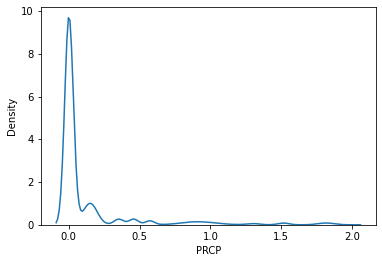

In [48]:
sns.kdeplot(data['PRCP'])

<AxesSubplot:xlabel='SNOW', ylabel='Density'>

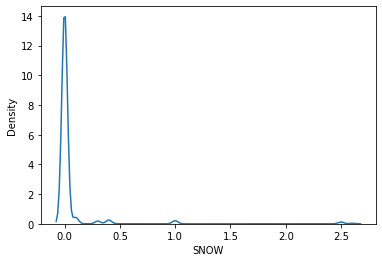

In [49]:
sns.kdeplot(data['SNOW'])

<AxesSubplot:xlabel='SNWD', ylabel='Density'>

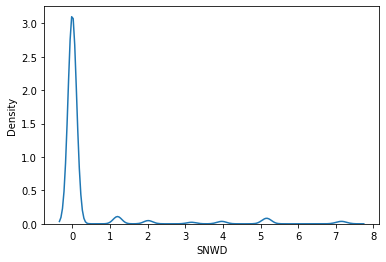

In [50]:
sns.kdeplot(data['SNWD'])

**In all the three kdeplots we can observe all the three are leptokurtic curves having right skewness**

**For these feautures missing values are imputed by the median value**

In [51]:
data['PRCP']=data['PRCP'].fillna(data['PRCP'].median())
data['SNOW']=data['SNOW'].fillna(data['SNOW'].median())
data['SNWD']=data['SNWD'].fillna(data['SNWD'].median())

In [52]:
submission.head()

,DATE,LOW,HIGH,TIMESTAMP,WIND_CHILL,PRCP_SNOW_RATIO,PLANE_AGE_AIRLINE_AIRPORT_FLIGHTS_MONTH_RATIO,SEAT_DISTRIBUTION,SEAT_DISTRIBUTION_NORMALISED
0,04/01/20,0800,0859,04/01/20 08:00,53.965464,0,0,0,0
1,04/01/20,0600,0659,04/01/20 06:00,56.473086,0,0,0,0
2,04/01/20,1200,1259,04/01/20 12:00,79.678830,0,0,0,0
3,03/01/20,1000,1059,03/01/20 10:00,33.944654,0,0,0,0
4,03/01/20,2200,2259,03/01/20 22:00,25.860071,0,0,0,0


In [53]:
submission['PRCP_SNOW_RATIO']=data['PRCP']/(data['SNOW']+data['SNWD'])

In [54]:
submission.head()

,DATE,LOW,HIGH,TIMESTAMP,WIND_CHILL,PRCP_SNOW_RATIO,PLANE_AGE_AIRLINE_AIRPORT_FLIGHTS_MONTH_RATIO,SEAT_DISTRIBUTION,SEAT_DISTRIBUTION_NORMALISED
0,04/01/20,0800,0859,04/01/20 08:00,53.965464,NaN,0,0,0
1,04/01/20,0600,0659,04/01/20 06:00,56.473086,NaN,0,0,0
2,04/01/20,1200,1259,04/01/20 12:00,79.678830,NaN,0,0,0
3,03/01/20,1000,1059,03/01/20 10:00,33.944654,0.00,0,0,0
4,03/01/20,2200,2259,03/01/20 22:00,25.860071,0.85,0,0,0


### d) Missing Value Treatment for remaining Features using Iterative Imputation

<AxesSubplot:xlabel='PLANE_AGE', ylabel='Density'>

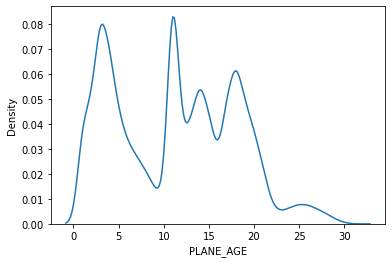

In [57]:
sns.kdeplot(data['PLANE_AGE'])

<AxesSubplot:xlabel='PLANE_AGE', ylabel='Density'>

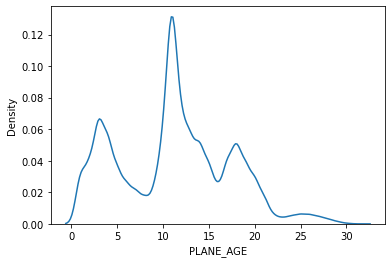

In [58]:
sns.kdeplot(data1['PLANE_AGE'])

<AxesSubplot:xlabel='AIRLINE_AIRPORT_FLIGHTS_MONTH', ylabel='Density'>

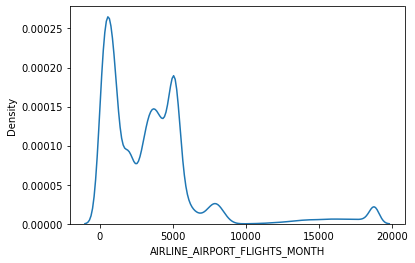

In [59]:
sns.kdeplot(data['AIRLINE_AIRPORT_FLIGHTS_MONTH'])

<AxesSubplot:xlabel='AIRLINE_AIRPORT_FLIGHTS_MONTH', ylabel='Density'>

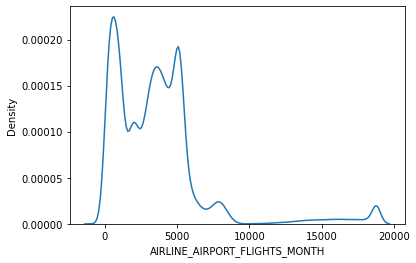

In [60]:
sns.kdeplot(data1['AIRLINE_AIRPORT_FLIGHTS_MONTH'])

In [61]:
submission['PLANE_AGE_AIRLINE_AIRPORT_FLIGHTS_MONTH_RATIO']=data1['PLANE_AGE']/data1['AIRLINE_AIRPORT_FLIGHTS_MONTH']

In [62]:
submission.head()

,DATE,LOW,HIGH,TIMESTAMP,WIND_CHILL,PRCP_SNOW_RATIO,PLANE_AGE_AIRLINE_AIRPORT_FLIGHTS_MONTH_RATIO,SEAT_DISTRIBUTION,SEAT_DISTRIBUTION_NORMALISED
0,04/01/20,0800,0859,04/01/20 08:00,53.965464,NaN,0.002311,0,0
1,04/01/20,0600,0659,04/01/20 06:00,56.473086,NaN,0.010582,0,0
2,04/01/20,1200,1259,04/01/20 12:00,79.678830,NaN,0.117021,0,0
3,03/01/20,1000,1059,03/01/20 10:00,33.944654,0.00,0.008772,0,0
4,03/01/20,2200,2259,03/01/20 22:00,25.860071,0.85,0.038385,0,0


In [63]:
submission['SEAT_DISTRIBUTION']=data1['NUMBER_OF_SEATS']/data1['CONCURRENT_FLIGHTS']

In [64]:
submission['SEAT_DISTRIBUTION_NORMALISED'] = (submission['SEAT_DISTRIBUTION']-submission['SEAT_DISTRIBUTION'].min())/(submission['SEAT_DISTRIBUTION'].max()-submission['SEAT_DISTRIBUTION'].min())

In [65]:
submission.head()

,DATE,LOW,HIGH,TIMESTAMP,WIND_CHILL,PRCP_SNOW_RATIO,PLANE_AGE_AIRLINE_AIRPORT_FLIGHTS_MONTH_RATIO,SEAT_DISTRIBUTION,SEAT_DISTRIBUTION_NORMALISED
0,04/01/20,0800,0859,04/01/20 08:00,53.965464,NaN,0.002311,7.322961,0.028586
1,04/01/20,0600,0659,04/01/20 06:00,56.473086,NaN,0.010582,3.040000,0.010549
2,04/01/20,1200,1259,04/01/20 12:00,79.678830,NaN,0.117021,9.157895,0.036313
3,03/01/20,1000,1059,03/01/20 10:00,33.944654,0.00,0.008772,10.667851,0.042671
4,03/01/20,2200,2259,03/01/20 22:00,25.860071,0.85,0.038385,1.750000,0.005117


In [66]:
submission.replace([np.inf, -np.inf], np.nan, inplace=True)# replacing infininity values with Nan

In [67]:
submission=submission.fillna(0)# Filling all the null values with 0

In [68]:
submission.head()

,DATE,LOW,HIGH,TIMESTAMP,WIND_CHILL,PRCP_SNOW_RATIO,PLANE_AGE_AIRLINE_AIRPORT_FLIGHTS_MONTH_RATIO,SEAT_DISTRIBUTION,SEAT_DISTRIBUTION_NORMALISED
0,04/01/20,0800,0859,04/01/20 08:00,53.965464,0.00,0.002311,7.322961,0.028586
1,04/01/20,0600,0659,04/01/20 06:00,56.473086,0.00,0.010582,3.040000,0.010549
2,04/01/20,1200,1259,04/01/20 12:00,79.678830,0.00,0.117021,9.157895,0.036313
3,03/01/20,1000,1059,03/01/20 10:00,33.944654,0.00,0.008772,10.667851,0.042671
4,03/01/20,2200,2259,03/01/20 22:00,25.860071,0.85,0.038385,1.750000,0.005117


In [69]:
submission.to_csv('Desktop/Machine hack/DEC/SS10.csv',index=False)